In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
os.chdir(r"C:\Users\User\Downloads\ml")

In [4]:
os.listdir()

['166151717866860ec2379f8793842aa5b168a_.xlsx',
 'act_pred_train.xlsx',
 'car data.csv',
 'car_done.csv',
 'corr.xlsx',
 'Crop_Recommendation_Model.ipynb',
 'cust_new ml.csv',
 'Data ml.csv',
 'kc_house_data.csv',
 'LinearRegressionCarSales.ipynb',
 'Loan Data linear reg. SAhil (1) (1).ipynb',
 'LogReg_Default.ipynb',
 'Notes25(AutoRecovered).xlsx',
 'Notes25.xlsx',
 'outlier.xlsx',
 'Project 5 car data-checkpoint.ipynb',
 'RealEstate_California.csv']

In [5]:
df=pd.read_csv("kc_house_data.csv")

In [5]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
df.shape

(21613, 21)

* In this data we have 21613  rows & 21 columns

In [8]:
df["waterfront"].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [9]:
df["view"].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [10]:
df.dtypes[df.dtypes=="object"].index

Index(['date'], dtype='object')

In [11]:
df.dtypes[df.dtypes!="object"].index

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

* In this data we have 1 object & 20 non object 
* price is our target variable 

In [12]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

* We don't have missing values in this data so,  we don't do missing value treatment

In [13]:
df["id"].nunique()

21436

* Q: how we know number of resold houses?
** A:we observed id in data the number of unique ids in data is 21436
and the ids given is 21613 it means some of ids were repeated it means  houses were resold.

house resold=[21613-21436]
house resold=177
* Around 177 houses were resold 

# Univariate analysis

In [17]:
df["building_yr"]=pd.to_datetime('today').year-df["yr_built"]


In [18]:
df.drop(columns=["date"], inplace=True)

*In above  columns we subtracted current day to yr of built col.by this we know age of bilding  and created a col.(building_yr)

* also we drop date col. 

In [19]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,building_yr
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,67
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,71
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,89
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,57
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,13
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,8
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,13
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,18


In [20]:
def univariate_num(data, x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min() , 2)
    max1=round(data[x].max() , 2)
    mean=round(data[x].mean() , 2)
    var=round(data[x].var(), 2)
    std=round(data[x].std(), 2)
    range1=round(max1-min1, 2)
    q1=round(data[x].quantile(.25), 2)
    q2=round(data[x].quantile(.5),2)
    q3=round(data[x].quantile(.75),2)
    skew=round(data[x].skew(), 2)
    kurt=round(data[x].kurt(), 2)
    my_value={"missing": missing, "min": min1, "max": max1, "mean":mean, "var": var, "std":std,
             "range":range1, "q1":q1, "q2":q2,"q3":q3,
            "skewness":skew, "kurtosis":kurt}
    sns.histplot(data[x])
    plt.show()
    sns.boxplot(data=df, y=data[x])
    plt.show
    return my_value

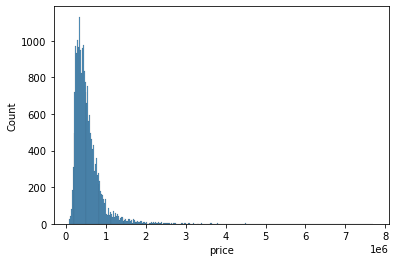

{'missing': 0,
 'min': 75000.0,
 'max': 7700000.0,
 'mean': 540088.14,
 'var': 134782378397.25,
 'std': 367127.2,
 'range': 7625000.0,
 'q1': 321950.0,
 'q2': 450000.0,
 'q3': 645000.0,
 'skewness': 4.02,
 'kurtosis': 34.59}

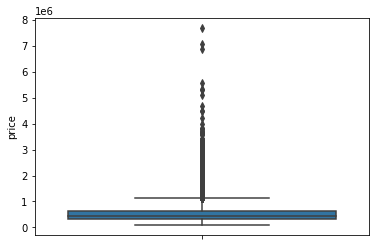

In [21]:
univariate_num(data=df,x="price")

Price
* no missing values
* minimum house price is 75000 and max is 7700000
* avg house price is  540088.14
* Outliers in price (column)

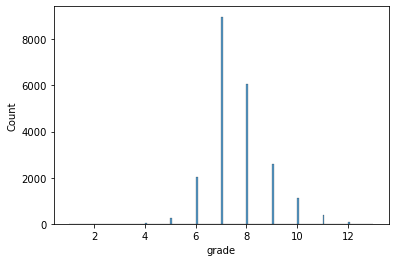

{'missing': 0,
 'min': 1,
 'max': 13,
 'mean': 7.66,
 'var': 1.38,
 'std': 1.18,
 'range': 12,
 'q1': 7.0,
 'q2': 7.0,
 'q3': 8.0,
 'skewness': 0.77,
 'kurtosis': 1.19}

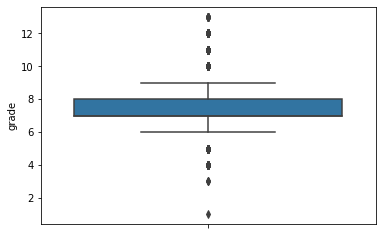

In [22]:
univariate_num(data=df,x="grade")

 * grade tells the ratings of house

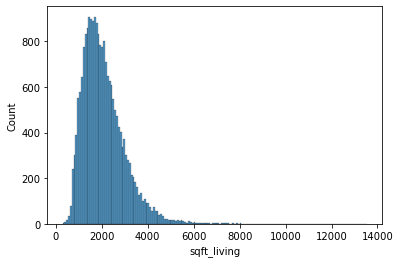

{'missing': 0,
 'min': 290,
 'max': 13540,
 'mean': 2079.9,
 'var': 843533.68,
 'std': 918.44,
 'range': 13250,
 'q1': 1427.0,
 'q2': 1910.0,
 'q3': 2550.0,
 'skewness': 1.47,
 'kurtosis': 5.24}

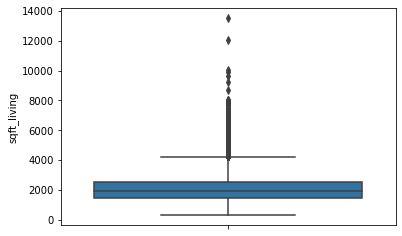

In [23]:
univariate_num(data=df,x="sqft_living")

sqft tells how much spacious is the house

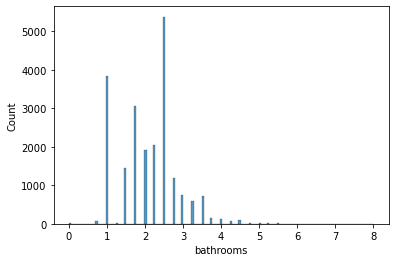

{'missing': 0,
 'min': 0.0,
 'max': 8.0,
 'mean': 2.11,
 'var': 0.59,
 'std': 0.77,
 'range': 8.0,
 'q1': 1.75,
 'q2': 2.25,
 'q3': 2.5,
 'skewness': 0.51,
 'kurtosis': 1.28}

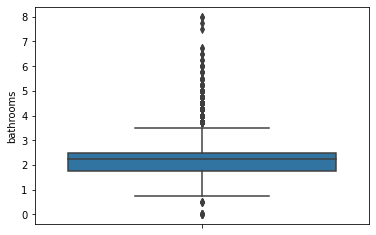

In [24]:
univariate_num(data=df,x="bathrooms")

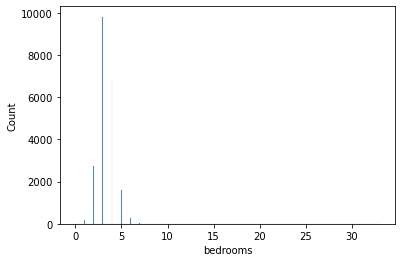

{'missing': 0,
 'min': 0,
 'max': 33,
 'mean': 3.37,
 'var': 0.87,
 'std': 0.93,
 'range': 33,
 'q1': 3.0,
 'q2': 3.0,
 'q3': 4.0,
 'skewness': 1.97,
 'kurtosis': 49.06}

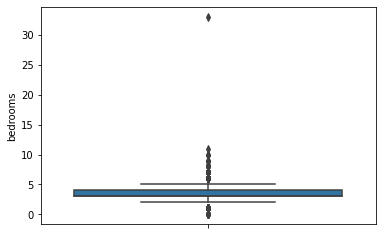

In [25]:
univariate_num(data=df,x="bedrooms")

# Bivariate analysis

In [26]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,building_yr
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,67
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,71
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,89
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,57
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,13
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,8
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,13
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,18


* we are droping few columns like lat,log,yr_built,id because
we have subsitude of all of them like zipcode , building_yr

In [27]:
df.drop(columns=["lat", "long", "yr_built", "id","sqft_above"], inplace=True)

In [28]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,sqft_living15,sqft_lot15,building_yr
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,98178,1340,5650,67
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1991,98125,1690,7639,71
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,0,98028,2720,8062,89
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,98136,1360,5000,57
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,0,98074,1800,7503,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,0,98103,1530,1509,13
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,0,98146,1830,7200,8
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,0,98144,1020,2007,13
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,0,98027,1410,1287,18


<AxesSubplot:xlabel='grade', ylabel='price'>

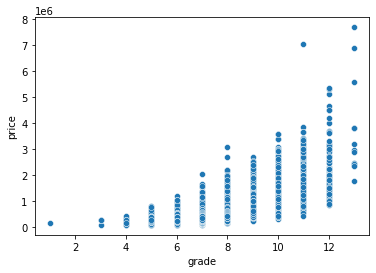

In [29]:
sns.scatterplot(data=df, x=df["grade"], y=df["price"])

this shows that grade matters for price

<AxesSubplot:xlabel='condition', ylabel='price'>

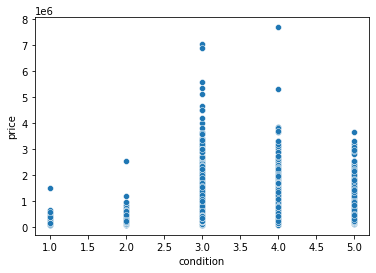

In [30]:
sns.scatterplot(data=df, x=df["condition"], y=df["price"])

this shows that  if condition is good so price will increse

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

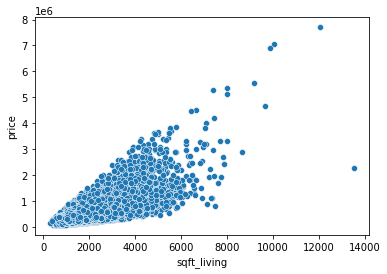

In [31]:
sns.scatterplot(data=df, x=df["sqft_living"], y=df["price"])

we have corr. between price and living area

### outliers treatment

In [32]:
df.describe(percentiles=[.01,.02,.03,.04,.05,.25,.5,.75,.90,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
price,21613.0,540088.141767,367127.196483,75000.0,153500.36,175000.00,191342.00,202344.00,210000.0,321950.00,450000.00,645000.0,887000.0,1156480.0,1259040.00,1388000.00,1600000.00,1964400.00,7700000.0
bedrooms,21613.0,3.370842,0.930062,0.0,2.00,2.00,2.00,2.00,2.0,3.00,3.00,4.0,4.0,5.0,5.00,5.00,5.00,6.00,33.0
bathrooms,21613.0,2.114757,0.770163,0.0,1.00,1.00,1.00,1.00,1.0,1.75,2.25,2.5,3.0,3.5,3.50,3.50,3.75,4.25,8.0
sqft_living,21613.0,2079.899736,918.440897,290.0,720.00,790.00,840.00,900.00,940.0,1427.00,1910.00,2550.0,3250.0,3760.0,3920.00,4140.00,4410.00,4978.80,13540.0
sqft_lot,21613.0,15106.967566,41420.511515,520.0,1013.12,1184.00,1305.36,1489.48,1800.0,5040.00,7618.00,10688.0,21397.6,43339.2,50658.16,67436.84,107157.00,213008.00,1651359.0
floors,21613.0,1.494309,0.539989,1.0,1.00,1.00,1.00,1.00,1.0,1.00,1.50,2.0,2.0,2.0,2.00,2.50,3.00,3.00,3.5
waterfront,21613.0,0.007542,0.086517,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,1.0
view,21613.0,0.234303,0.766318,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,2.0,2.00,3.00,3.00,4.00,4.0
condition,21613.0,3.409430,0.650743,1.0,3.00,3.00,3.00,3.00,3.0,3.00,3.00,4.0,4.0,5.0,5.00,5.00,5.00,5.00,5.0
grade,21613.0,7.656873,1.175459,1.0,5.00,6.00,6.00,6.00,6.0,7.00,7.00,8.0,9.0,10.0,10.00,10.00,11.00,11.00,13.0


We have outliers in our data so we will treat them with capping method

In [33]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'building_yr'],
      dtype='object')

In [34]:
df_out=[ "price", "sqft_living", "sqft_lot", "sqft_above", 
"sqft_basement",  "sqft_lot15", "sqft_living15", "bedrooms", "bathrooms", "grade"]

In [35]:
df_not_out=df.drop(columns=["bedrooms", "bathrooms", "price", "sqft_living", "sqft_lot", "grade", "sqft_above", 
"sqft_basement",  "sqft_lot15", "sqft_living15"])

In [36]:
df1_out=df[df_out]

In [37]:
df1_out

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_lot15,sqft_living15,bedrooms,bathrooms,grade
0,221900.0,1180,5650,1180,0,5650,1340,3,1.00,7
1,538000.0,2570,7242,2170,400,7639,1690,3,2.25,7
2,180000.0,770,10000,770,0,8062,2720,2,1.00,6
3,604000.0,1960,5000,1050,910,5000,1360,4,3.00,7
4,510000.0,1680,8080,1680,0,7503,1800,3,2.00,8
...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,1530,1131,1530,0,1509,1530,3,2.50,8
21609,400000.0,2310,5813,2310,0,7200,1830,4,2.50,8
21610,402101.0,1020,1350,1020,0,2007,1020,2,0.75,7
21611,400000.0,1600,2388,1600,0,1287,1410,3,2.50,8


In [38]:
### Outilers capping Function - Method -1
def  outliers_percentile(x):
    x=x.clip(upper=x.quantile(.99))
#   x=x.clip(lower=x.quantile(.01))
    return x

In [39]:
df1=df.apply(outliers_percentile)

In [40]:
df1.describe(percentiles=[.01,.02,.03,.04,.05,.25,.5,.75,.90,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
price,21613.0,532636.397446,317755.440835,75000.0,153500.36,175000.00,191342.00,202344.00,210000.0,321950.00,450000.00,645000.0,887000.0,1156480.0,1259040.00,1388000.00,1600000.00,1963872.000,1964400.00
sqft_living,21613.0,2070.087984,874.081832,290.0,720.00,790.00,840.00,900.00,940.0,1427.00,1910.00,2550.0,3250.0,3760.0,3920.00,4140.00,4410.00,4977.744,4978.80
sqft_lot,21613.0,13983.659140,27703.785133,520.0,1013.12,1184.00,1305.36,1489.48,1800.0,5040.00,7618.00,10688.0,21397.6,43339.2,50658.16,67436.84,107157.00,213008.000,213008.00
sqft_above,21613.0,1780.919539,796.414824,290.0,700.00,750.00,790.00,820.00,850.0,1190.00,1560.00,2210.0,2950.0,3400.0,3520.00,3700.00,3970.00,4370.000,4370.00
sqft_basement,21613.0,288.171008,429.005284,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,560.0,970.0,1190.0,1250.00,1340.00,1450.00,1660.000,1660.00
sqft_lot15,21613.0,12002.937445,19873.292732,651.0,1191.24,1296.24,1426.36,1670.96,1999.2,5100.00,7620.00,10083.0,17852.4,37062.8,42654.44,51400.00,80188.28,157687.000,157687.00
sqft_living15,21613.0,1981.970620,668.390544,399.0,950.00,1020.00,1060.00,1100.00,1140.0,1490.00,1840.00,2360.0,2930.0,3300.0,3420.00,3560.00,3767.60,4080.000,4080.00
bedrooms,21613.0,3.365012,0.889130,0.0,2.00,2.00,2.00,2.00,2.0,3.00,3.00,4.0,4.0,5.0,5.00,5.00,5.00,6.000,6.00
bathrooms,21613.0,2.109113,0.749363,0.0,1.00,1.00,1.00,1.00,1.0,1.75,2.25,2.5,3.0,3.5,3.50,3.50,3.75,4.250,4.25
grade,21613.0,7.651506,1.157245,1.0,5.00,6.00,6.00,6.00,6.0,7.00,7.00,8.0,9.0,10.0,10.00,10.00,11.00,11.000,11.00


In [41]:
df2=pd.concat([df1, df_not_out], axis=1)

In [42]:
df2.describe(percentiles=[.01,.02,.03,.04,.05,.25,.5,.75,.90,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
price,21613.0,532636.397446,317755.440835,75000.0,153500.36,175000.00,191342.00,202344.00,210000.0,321950.00,450000.00,645000.0,887000.0,1156480.0,1259040.00,1388000.00,1600000.00,1963872.000,1964400.00
sqft_living,21613.0,2070.087984,874.081832,290.0,720.00,790.00,840.00,900.00,940.0,1427.00,1910.00,2550.0,3250.0,3760.0,3920.00,4140.00,4410.00,4977.744,4978.80
sqft_lot,21613.0,13983.659140,27703.785133,520.0,1013.12,1184.00,1305.36,1489.48,1800.0,5040.00,7618.00,10688.0,21397.6,43339.2,50658.16,67436.84,107157.00,213008.000,213008.00
sqft_above,21613.0,1780.919539,796.414824,290.0,700.00,750.00,790.00,820.00,850.0,1190.00,1560.00,2210.0,2950.0,3400.0,3520.00,3700.00,3970.00,4370.000,4370.00
sqft_basement,21613.0,288.171008,429.005284,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,560.0,970.0,1190.0,1250.00,1340.00,1450.00,1660.000,1660.00
sqft_lot15,21613.0,12002.937445,19873.292732,651.0,1191.24,1296.24,1426.36,1670.96,1999.2,5100.00,7620.00,10083.0,17852.4,37062.8,42654.44,51400.00,80188.28,157687.000,157687.00
sqft_living15,21613.0,1981.970620,668.390544,399.0,950.00,1020.00,1060.00,1100.00,1140.0,1490.00,1840.00,2360.0,2930.0,3300.0,3420.00,3560.00,3767.60,4080.000,4080.00
bedrooms,21613.0,3.365012,0.889130,0.0,2.00,2.00,2.00,2.00,2.0,3.00,3.00,4.0,4.0,5.0,5.00,5.00,5.00,6.000,6.00
bathrooms,21613.0,2.109113,0.749363,0.0,1.00,1.00,1.00,1.00,1.0,1.75,2.25,2.5,3.0,3.5,3.50,3.50,3.75,4.250,4.25
grade,21613.0,7.651506,1.157245,1.0,5.00,6.00,6.00,6.00,6.0,7.00,7.00,8.0,9.0,10.0,10.00,10.00,11.00,11.000,11.00


# Multicollinearility

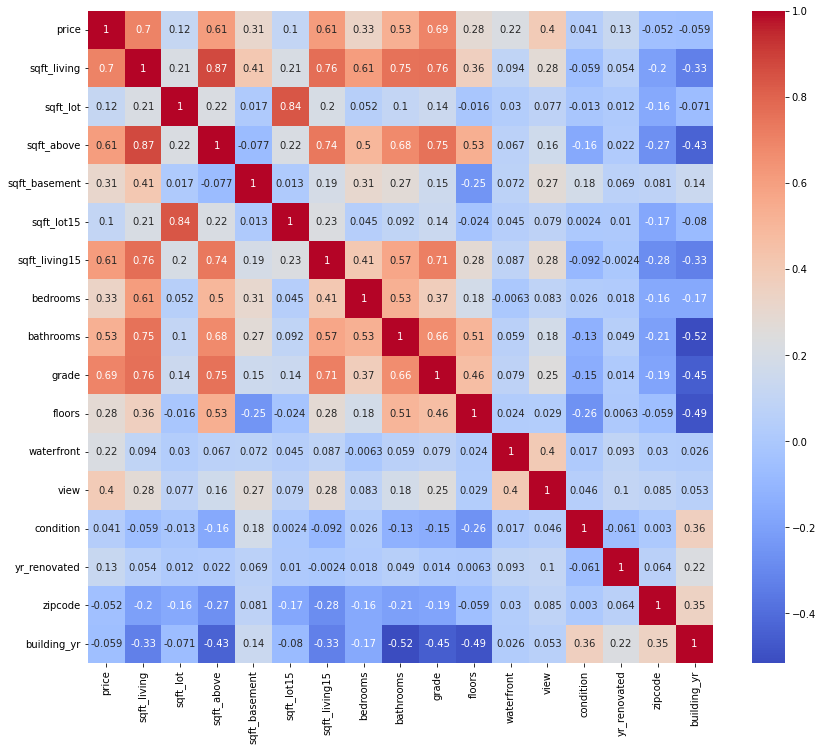

In [43]:
cr=df2.corr()
cr
plt.figure(figsize=(14,12))
sns.heatmap(cr, annot=True, cmap="coolwarm")
plt.show()

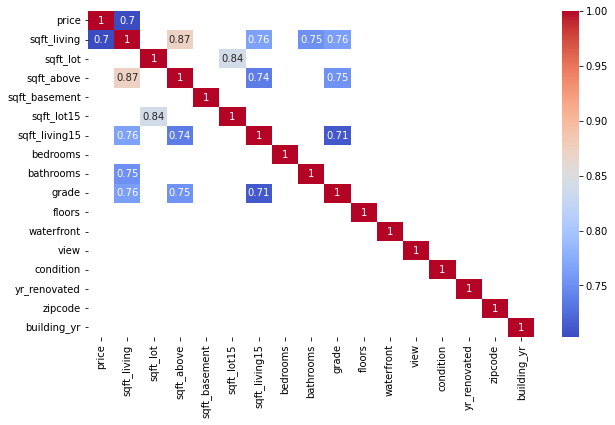

In [44]:
cr1=cr[abs(cr)>.7]

plt.figure(figsize=(10,6))
sns.heatmap(cr1, annot=True, cmap="coolwarm")
plt.show()                                                #annot = show numbers in graaph

### VIF

In [47]:
df2.columns

Index(['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'sqft_lot15', 'sqft_living15', 'bedrooms', 'bathrooms', 'grade',
       'floors', 'waterfront', 'view', 'condition', 'yr_renovated', 'zipcode',
       'building_yr'],
      dtype='object')

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=df2[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'sqft_lot15', 'sqft_living15', 'bedrooms', 'bathrooms', 'grade',
       'floors', 'waterfront', 'view', 'condition', 'yr_renovated', 'zipcode',
       'building_yr']]
vif_data=pd.DataFrame()
vif_data["feature"]=X.columns

# calculating vif for each feature

vif_data["VIF"]=[variance_inflation_factor(X.values,i)
                for i in range(len(X.columns))]

vif_data.sort_values(by=["VIF"])

,feature,VIF
14,yr_renovated,1.197183
11,waterfront,1.238344
12,view,1.564144
2,sqft_lot,4.302298
5,sqft_lot15,4.737343
16,building_yr,9.337975
0,price,11.682439
10,floors,17.264181
7,bedrooms,27.111178
6,sqft_living15,28.725383


### Normality check

In [50]:
from scipy.stats import jarque_bera

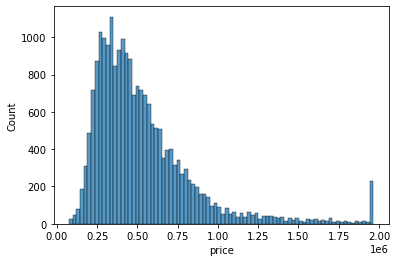

In [51]:
sns.histplot(df2["price"])
plt.show()

In [52]:
jarque_bera(df2["price"])

Jarque_beraResult(statistic=41409.988832417606, pvalue=0.0)

<AxesSubplot:xlabel='price', ylabel='Count'>

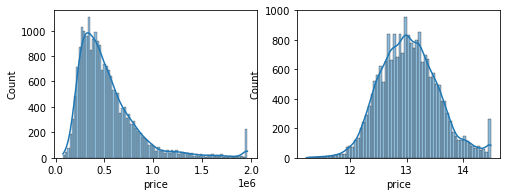

In [53]:
plt.figure(figsize=(8,6))
plt.subplot(221)
sns.histplot(df2["price"], kde=True)         # first row second columns and 3 position (121)
plt.subplot(222)
sns.histplot(np.log1p(df2["price"]), kde=True)

In [54]:
jarque_bera((df2["price"]))

Jarque_beraResult(statistic=41409.988832417606, pvalue=0.0)

### Model development

In [66]:
x=df2[[ 'sqft_basement', 'sqft_lot15', 'sqft_living15', 'bedrooms',
       'bathrooms', 'grade', 'floors', 'waterfront', 'view', 'condition',
       'yr_renovated', 'building_yr','zipcode']]
y=df2["price"]

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn import metrics

In [68]:
x_train, x_test, y_train, y_test=train_test_split(x, y , test_size=.25, random_state=0)

In [69]:
reg=LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [70]:
reg.coef_

array([ 7.01766330e+01, -1.98404134e-01,  9.85796601e+01, -7.94523081e+03,
        6.68286225e+04,  1.40159857e+05,  5.50902437e+04,  3.58570636e+05,
        3.99519955e+04,  2.02651184e+04,  1.43857490e+01,  3.45643360e+03,
        3.36220825e+01])

In [71]:
print("train R^2 : ",  reg.score(x_train, y_train))

train R^2 :  0.6568595317440491


In [72]:
print("train R^2 : ",  reg.score(x_test, y_test))

train R^2 :  0.656080994139703


In [73]:
pred_train=(reg.predict(x_train))
pred_train                                        #for predict values find

array([ 98443.78203209, 412753.9865865 , 596954.96343027, ...,
       732536.92681971, 560321.52229716, 493351.30423416])

In [74]:
pred_test=(reg.predict(x_test))
pred_test

array([ 305521.38354548, 1219795.44954746,  455713.50530201, ...,
        859014.72551053,  257848.22887048,  465458.26605028])

In [75]:
y_train=(y_train)
y_train

1956      420850.0
15678     335000.0
8729      587100.0
19064     495000.0
11291     780000.0
           ...    
13123    1180000.0
19648     299000.0
9845      431000.0
10799     411000.0
2732      699900.0
Name: price, Length: 16209, dtype: float64

In [76]:
y_test=(y_test)

In [77]:
print("Train MSE", np.mean((pred_train-y_train)**(2)))
print("Train RMSE", np.sqrt(np.mean((pred_train-y_train)**(2))))
print("Train MAE",  np.mean(np.abs(pred_train-y_train)))
print("Train MAPE",  np.mean(np.abs((pred_train-y_train)/y_train)))

Train MSE 34824728824.17986
Train rmse 186613.84949724353
Train MAE 132439.23205788393
Train MAPE 0.2858978903262404


In [78]:
gh=pd.DataFrame({'Y_act':y_train, 'Y_pred': pred_train})

<AxesSubplot:>

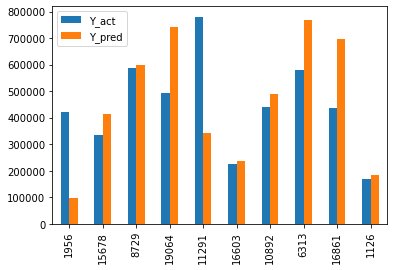

In [79]:
gh.head(10).plot(kind='bar')

### SGD

In [80]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
mn.fit(x_train)

MinMaxScaler()

In [81]:
x_train_trans=mn.transform(x_train)
x_test_trans=mn.transform(x_test)

In [82]:
x_train_trans_df=pd.DataFrame(x_train_trans,columns=x_train.columns)
x_train_trans_df.head(2)

,sqft_basement,sqft_lot15,sqft_living15,bedrooms,bathrooms,grade,floors,waterfront,view,condition,yr_renovated,building_yr,zipcode
0,0.0,0.125443,0.250204,0.166667,0.235294,0.4,0.0,0.0,0.0,1.0,0.000000,0.608696,0.065657
1,0.0,0.059770,0.304537,0.500000,0.411765,0.6,0.0,0.0,0.0,0.5,0.980645,0.582609,0.136364


In [83]:
from sklearn.linear_model import  SGDRegressor

In [84]:
sgd=SGDRegressor(loss="squared_error" , epsilon=0.01, penalty="l1" ,max_iter=100000000 ,tol=1e-7, random_state=0)

In [85]:
sgd.fit(x_train_trans, y_train)

SGDRegressor(epsilon=0.01, max_iter=100000000, penalty='l1', random_state=0,
             tol=1e-07)

In [86]:
sgd.fit(x_test_trans,y_test)

SGDRegressor(epsilon=0.01, max_iter=100000000, penalty='l1', random_state=0,
             tol=1e-07)

In [87]:
sgd.score(x_train_trans,y_train)

0.6532473483686285

In [89]:
sgd.score(x_test_trans,y_test)

0.6535736617589607

In [ ]:
# (df["price"].corr(df["grade"]).plot(x="price", y=["grade"], kind="bar", figsize=(9, 8))
# plt.show())

In [ ]:
MAE : Absolute_error : l1 error
MSE : Squared_error : l2 eroor